In [68]:
!pip3 install diffprivlib
import diffprivlib.models as dp
import numpy as np
from sklearn.linear_model import LogisticRegression
import psutil
import time
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer

In [69]:
start_time = time.time()
X_train = np.loadtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                        usecols=(0, 4, 10, 11, 12), delimiter=", ") # only use integer features for training
 
y_train = np.loadtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                        usecols=14, dtype=str, delimiter=", ") # set last column as prediction label
np.unique(y_train)


array(['<=50K', '>50K'], dtype='<U5')

In [70]:
X_test = np.loadtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",
                        usecols=(0, 4, 10, 11, 12), delimiter=", ", skiprows=1)
 
y_test = np.loadtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",
                        usecols=14, dtype=str, delimiter=", ", skiprows=1)
 
y_test = np.array([a[:-1] for a in y_test]) # Must trim trailing period "." from label
 
np.unique(y_test)


array(['<=50K', '>50K'], dtype='<U5')

In [71]:
logreg = Pipeline([
    ('scaler', MinMaxScaler()), # scale min max of features to better fit sigmoid curve, control norm of data
    ('clf', LogisticRegression(solver="lbfgs")) # this process is smoothen by using pipeline in sklearn
])

In [72]:
logreg.fit(X_train, y_train)

baseline = logreg.score(X_test, y_test)
print("Non-private baseline R2 score: %.2f" % baseline)

Non-private baseline R2 score: 0.81


In [73]:
dp_logreg = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', dp.LogisticRegression(epsilon=float("inf"), data_norm=2))
])

dp_logreg.fit(X_train, y_train)

baseline2 = dp_logreg.score(X_test, y_test)
print("private baseline R2 score: %.2f" % baseline2)

private baseline R2 score: 0.81


Visualising the tradeoff beween accuracy and epsilok using matplotlib

In [ ]:
accuracy = []
epsilons = np.logspace(-3, 1, 500)
cpu_Overhead = []
mem_Overhead = []

for eps in epsilons:
    dp_logreg.set_params(clf__epsilon=eps).fit(X_train, y_train)
    cpu_Overhead.append(psutil.cpu_percent())
    psutil.virtual_memory()
    dict(psutil.virtual_memory()._asdict())
    mem_Overhead.append(psutil.virtual_memory().percent)
    
    accuracy.append(dp_logreg.score(X_test, y_test))

--- 85.3791823387146 seconds ---


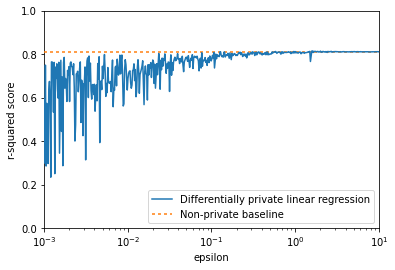

In [ ]:
print("--- %s seconds ---" % (time.time() - start_time))
plt.semilogx(epsilons, accuracy, label="Differentially private linear regression", zorder=10)
plt.semilogx(epsilons, baseline * np.ones_like(epsilons), dashes=[2,2], label="Non-private baseline", zorder=5)
plt.xlabel("epsilon")
plt.ylabel("r-squared score")
plt.ylim(0, 1)
plt.xlim(epsilons[0], epsilons[-1])
plt.legend(loc=4)
plt.savefig('adult.png')

In [ ]:
print(sum((cpu_Overhead))/500)
print(sum((mem_Overhead))/500)

99.8044
6.400000000000056


In [ ]:
accuracy_final1 = []
for _ in " "*10: 
  dp_logreg.set_params(clf__epsilon=1).fit(X_train, y_train) 
  accuracy_final1.append(dp_logreg.score(X_test, y_test))


In [ ]:
accuracy_final01 = []
for _ in " "*10: 
  dp_logreg.set_params(clf__epsilon=0.1).fit(X_train, y_train) 
  accuracy_final01.append(dp_logreg.score(X_test, y_test))

In [ ]:
accuracy_final001 = []
for _ in " "*10: 
  dp_logreg.set_params(clf__epsilon=0.01).fit(X_train, y_train) 
  accuracy_final001.append(dp_logreg.score(X_test, y_test))

In [ ]:
accuracy_final = []
accuracy_final1.remove(max(accuracy_final1))
accuracy_final1.remove(min(accuracy_final1))

accuracy_final01.remove(max(accuracy_final01))
accuracy_final01.remove(min(accuracy_final01))

accuracy_final001.remove(max(accuracy_final001))
accuracy_final001.remove(min(accuracy_final001))

accuracy_final.append(sum(accuracy_final1)/10)
accuracy_final.append(sum(accuracy_final01)/10)
accuracy_final.append(sum(accuracy_final001)/10)

In [ ]:
accuracy_final

[0.6456053067993366, 0.631822369633315, 0.5487685031631965]

In [ ]:
accuracy_NP = []
for _ in " "*10: 
  logreg.set_params(clf__solver='lbfgs').fit(X_train, y_train) 
  accuracy_NP.append(logreg.score(X_test, y_test))

In [ ]:
print(sum(accuracy_NP)/10)

0.8103924820342729
